# Hierarchical Clustering 

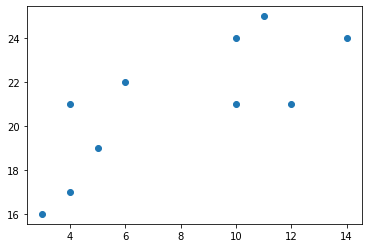

In [2]:
# We will Start by visualizing some data points:
import numpy as np
import matplotlib.pyplot as plt
                                             
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

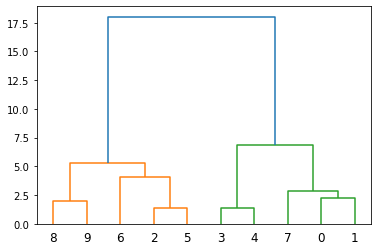

In [1]:
#Now we compute the ward linkage using euclidean distance, and visualize it using a dendrogram:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

# Response Variable Methodology

In [7]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the design matrix (X)
X = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]])

# Define the response variable (y)
y = np.array([40, 70, 60, 90, 50, 50, 50, 50])

# Define the model equation
def model_eqn(x1, x2, x3, b0, b1, b2, b3, b12, b13, b23, b11, b22, b33):
    return b0 + b1*x1 + b2*x2 + b3*x3 + b12*x1*x2 + b13*x1*x3 + b23*x2*x3 + b11*x1**2 + b22*x2**2 + b33*x3**2

# Define the design points for generating the contour plots
x1 = np.linspace(-1, 1, 50)
x2 = np.linspace(-1, 1, 50)
x1, x2 = np.meshgrid(x1, x2)
x3 = 0

# Fit the model to the data
model = sm.OLS(y, X)
results = model.fit()

# Extract the coefficients
b0, b1, b2, b3, b12, b13, b23, b11, b22, b33 = results.params

# Evaluate the model equation at the design points
y_pred = model_eqn(x1, x2, x3, b0, b1, b2, b3, b12, b13, b23, b11, b22, b33)

# Create a contour plot of the response surface
fig, ax = plt.subplots()
ax.contour(x1, x2, y_pred, levels=10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

ValueError: not enough values to unpack (expected 10, got 3)

# Hierarchical Clustering for Customer Data

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [9]:
#Data Exploration

In [10]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/Compressed/archive_7/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


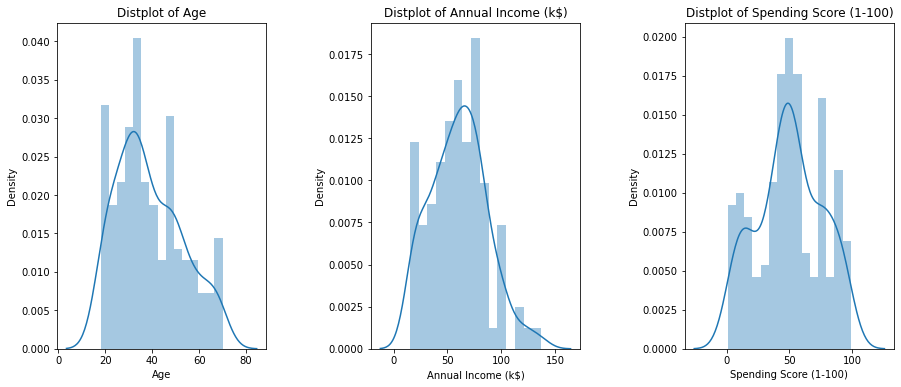

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


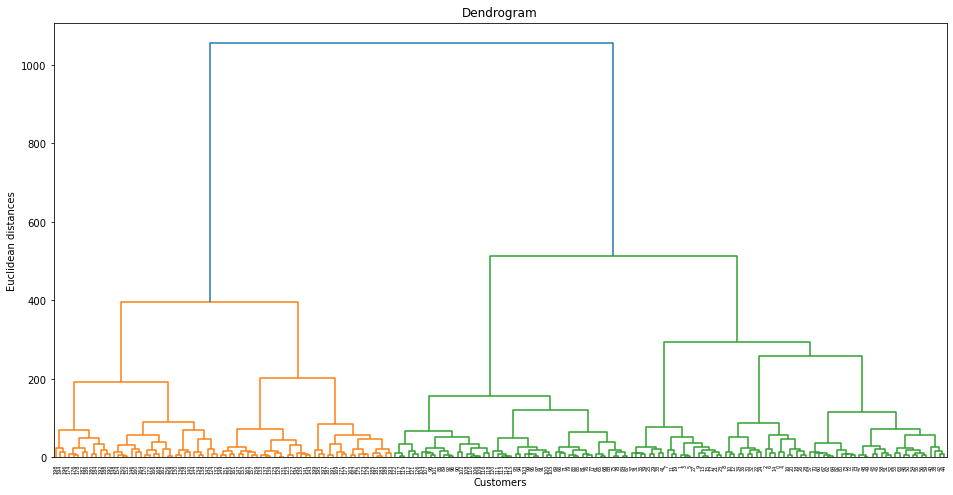

In [16]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()